## Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Contents

* ### EDA
    - Feature Analysis 
    - Finding trends in the data
    
* ### Data Cleaning and Feature Engineering
    - Interpolating Empty/ Nan Values 
    - Creating new features
    - Removing redundant/ unusable features

* ### Predictive Modelling
    - Finding the best Algorithm
    - Tuning the best Algorithm
    - Submitting results

## EDA (Exploratory Data Analysis)

In [312]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from IPython.display import display
%matplotlib inline

# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [313]:
# Import the datasets and have a peek at the data

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
passenger_ids = test_df["PassengerId"]

display(train_df.sample(n = 3))
display(test_df.sample(n = 3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.050,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.000,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.575,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
186,1078,2,"Phillips, Miss. Alice Frances Louisa",female,21.00,0,1,S.O./P.P. 2,21.000,NaN,S
64,956,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.375,B57 B59 B63 B66,C
307,1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.350,NaN,S


In [314]:
# Are there any missing values?, any variables that need to be converted to another type?

print("Training Data Info\n")
display(train_df.info())

print("Testing Data Info\n")
display(test_df.info())

Training Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

Testing Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

<u>We get the following observations after looking at the data :</u>

#### Continious Features

1. Age
2. Fare

We need to check for any skeweness in these continious feature distributions and scale/ bin them so that they may work well with models that use distances

#### Categorical Feature/ Nominal Features

1. Sex
2. Embarked

We would need to hot encode them

#### Ordinal/ Interval Features
 
1. Pclass
2. SibSp
3. Parch

#### Alphanumeric

1. Name
2. Cabin

#### The following columns have null values and need to be dropped or interpolated :

1. Age (Both in training and testing data)
2. Cabin (Both)
3. Embarked (Training data)
4. Fare (Testing data)

#### The following are variables we need to transform to get any information out of or need to drop them.

1. Name
2. Cabin
3. Ticket

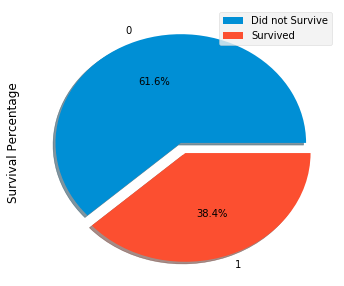

In [315]:
# How many people actually survived the accident.

train_df['Survived'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (5, 5), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Survival Percentage")
plt.legend(["Did not Survive", "Survived"])
plt.show()

It is evident from the above pie chart that a lot of people didn't survive the accident. 
The survival rate is 38.4% which is pretty low. Lets deep dive into the data and see which kind of people did/didn't survive the accident

Lets study some trends in the data

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

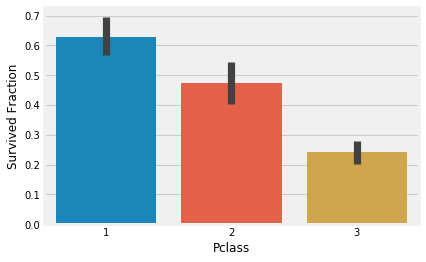

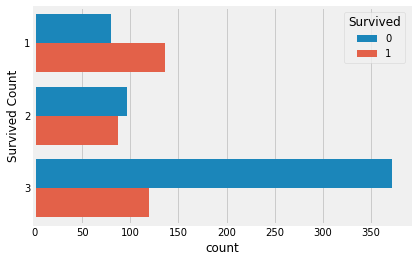

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [316]:
# Relationship b/w pclass and survived

survival_by_class = train_df.groupby("Pclass")["Survived"].mean()
display(survival_by_class)

sns.barplot(x = "Pclass", y = "Survived", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

sns.countplot(y = 'Pclass', hue='Survived', data = train_df)
plt.ylabel("Survived Count")
plt.show()

pd.crosstab(train_df["Pclass"], train_df["Survived"], margins = True).style.background_gradient(cmap = 'summer_r')

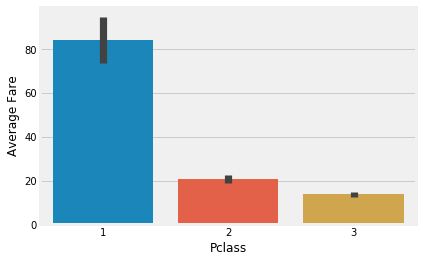

In [317]:
sns.barplot(x = "Pclass", y = "Fare", data = train_df)
plt.ylabel("Average Fare")
plt.show()

Looks like better the Socio Economic Class( Since they paid a higher fare ), more the chances of survival.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

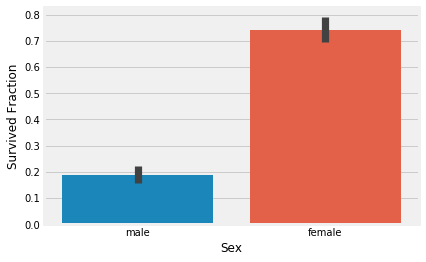

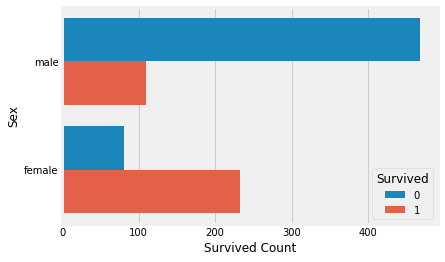

In [318]:
# Relationship b/w Sex and Survived

survival_by_sex = train_df.groupby("Sex")["Survived"].mean()
display(survival_by_sex)

sns.barplot(x = "Sex", y = "Survived", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

sns.countplot(y = "Sex", hue = "Survived", data = train_df)
plt.xlabel("Survived Count")
plt.show()

Looking at the above statistics, women had a higher chance of surviving then men.

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

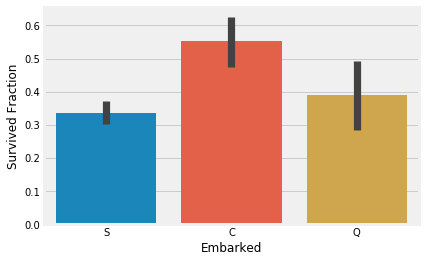

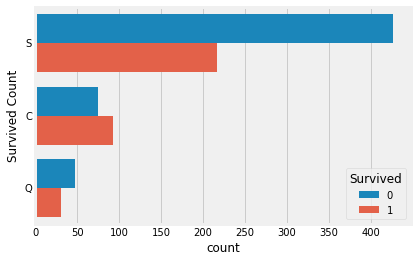

In [319]:
# Does the Port of Embarkation have any relation to Survival rate?

survival_by_port = train_df.groupby("Embarked")["Survived"].mean()
display(survival_by_port)

sns.barplot(x = "Embarked", y = "Survived", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

sns.countplot(y = "Embarked", hue = "Survived", data = train_df)
plt.ylabel("Survived Count")
plt.show()

Looks like there is correlation here. People who embarked from Cherbourg had a higher chance of survival than the other ports.

In [320]:
# Lets check for Survival rate with Pclass and Sex together

pd.crosstab([train_df["Sex"], train_df["Survived"]], train_df["Pclass"], margins = True).style.background_gradient(cmap = 'summer_r')

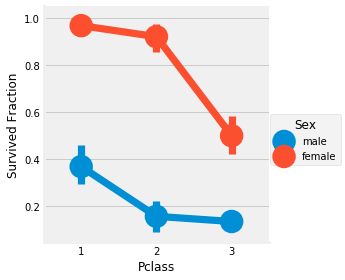

In [321]:
sns.factorplot(x = "Pclass", y = "Survived", hue = "Sex", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

The survival rate for women is better than men irrespective of class. Though the survival rate in general decreases as with decrease in socio economic status. Therefore both of these features are necessary for our analysis.

In [322]:
# We earlier figured out that Cherbourg had the highest survival rate. Did majority of people from class 1 embarked from Cherbourg ?

pd.crosstab([train_df["Pclass"], train_df["Survived"]],train_df["Embarked"], margins = True).style.background_gradient(cmap = 'summer_r')

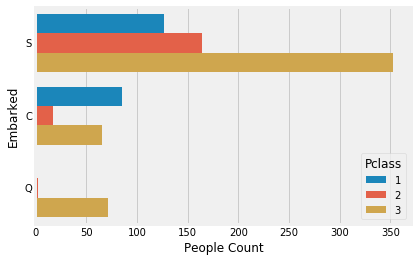

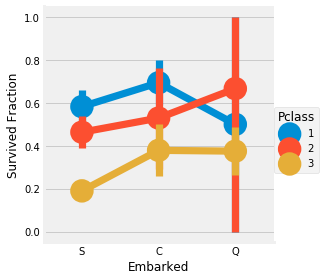

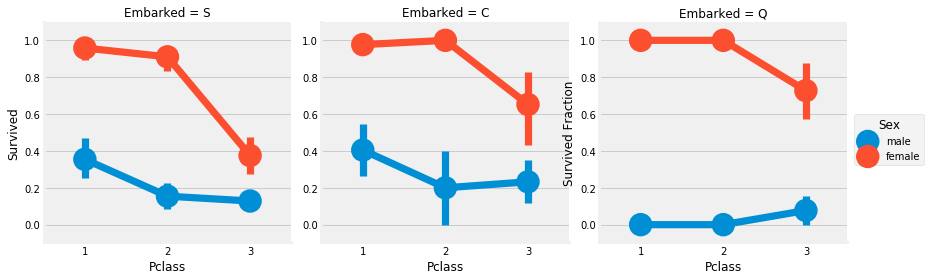

In [323]:
sns.countplot(y = "Embarked", hue = "Pclass", data = train_df)
plt.xlabel("People Count")
plt.show()

sns.factorplot(x = "Embarked", y = "Survived", hue = "Pclass", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked', data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

Majority of class 1 people actually boarded from Southampton but the proportion of class 1 people is highest in Cherbourg and is almost 50%. Maybe thats why majority of people who boarded from Cherbourg had a decent rate of survival.

This relationship is a little tricky. People of the same class have almost the same rate of survival among the different ports(There are some exceptions :- Class 3 people for Southampton had a lower rate of survial than the same class people who boarded from other ports and Class 2 people from Q had a higher rate of survival, even higher than class 1 people(Gender is at play here as we can see from the last graph))

I am still not sure about a correlation here, so we leave the Embarked feature as is.

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


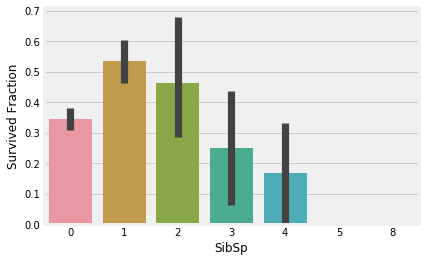

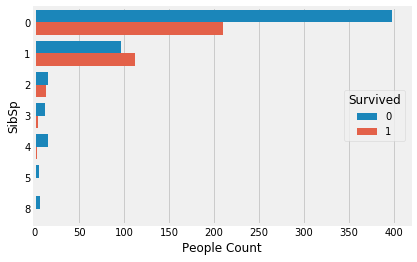

In [324]:
# Find realtionship b/w Parch/ SibSp and Survival

print(train_df.groupby("SibSp")["Survived"].mean())

sns.barplot(x = "SibSp", y = "Survived", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

sns.countplot(y = "SibSp", hue = "Survived", data = train_df)
plt.xlabel("People Count")
plt.show()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


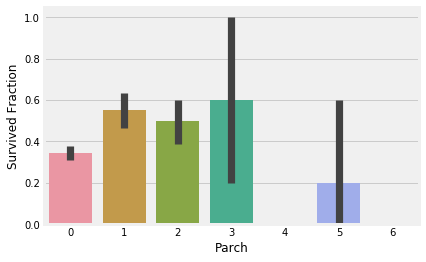

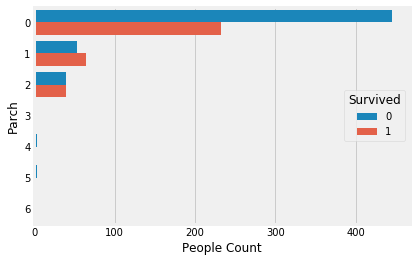

In [325]:
print(train_df.groupby("Parch")["Survived"].mean())

sns.barplot(x = "Parch", y = "Survived", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

sns.countplot(y = "Parch", hue = "Survived", data = train_df)
plt.xlabel("People Count")
plt.show()

More Sibling or spouses, less the chances of survival. But people who had no sibling/ spouses had an even lesser chance of survival.

Were most of these people were males? Did these people help others before helping themselves ?

Same is the case with parch.

In a nutshell, Bigger families had less survival rate, but there survival rate is better then people who travelled alone.

## Data Cleaning and Feature Engineering

Lets do a little bit of feature engg.

This step is heavily taken from 'Sina'(https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)
and 'Ash' (https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

In [326]:
import math

# Has a cabin ?

def hasCabin(x):
    return int((x["Cabin"] is not np.nan))

train_df["HasCabin"] = train_df.apply(hasCabin, axis = 1)
test_df["HasCabin"] = test_df.apply(hasCabin, axis = 1)

# Combine SibSp & Parch to create a new variable FamilySize

train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

# Use family size to create a new feature isAlone.

def isAlone(x):
    familySize = x["FamilySize"]
    return int(familySize == 1)

train_df["IsAlone"] = train_df.apply(isAlone, axis = 1)
test_df["IsAlone"] = test_df.apply(isAlone, axis = 1)

display(train_df.sample(n = 3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,FamilySize,IsAlone
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1,3,0
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,1,3,0
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,0,2,0


Lets study the effects of these newly created features on survival rate

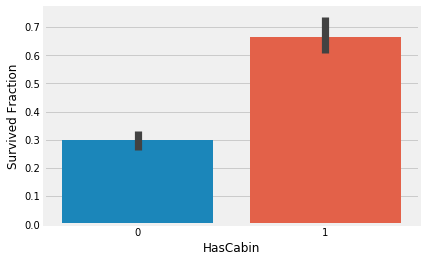

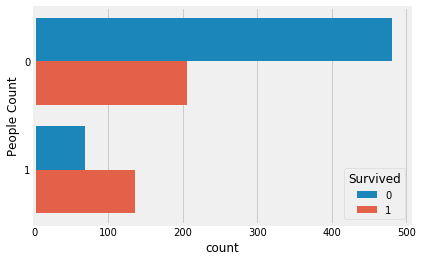

In [327]:
# 1. Cabin

sns.barplot(x = "HasCabin", y = "Survived", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

sns.countplot(y = "HasCabin", hue = "Survived", data = train_df)
plt.ylabel("People Count")
plt.show()

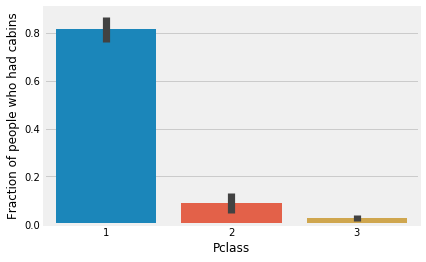

In [328]:
# People who had cabins are more likely to survive. Are most of these people from better socio economic background?

sns.barplot(x = "Pclass", y = "HasCabin", data = train_df)
plt.ylabel("Fraction of people who had cabins")
plt.show()

# Looks like it! Maximum people who had cabins belong to class 1 which already has a higher rate of survival. Maybe these two
# features are correlated


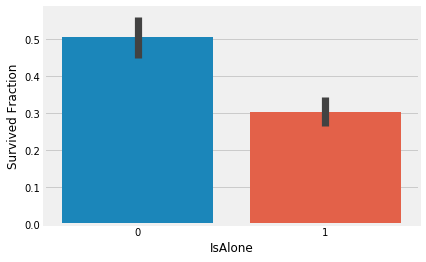

In [329]:
# 2. isAlone ?

sns.barplot(x = "IsAlone", y = "Survived", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

# People who are alone are less likely to survive as discussed earlier.

In [330]:
# Extract info about titles from Name. This will help in us interpolating age.

import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""    
    
train_df["Title"] = train_df["Name"].apply(get_title)
test_df["Title"] = test_df["Name"].apply(get_title)

train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

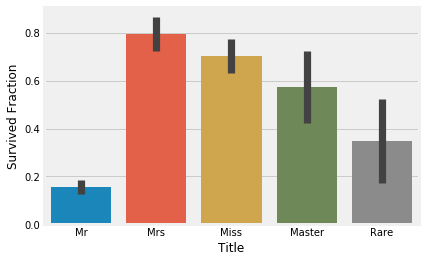

In [331]:
sns.barplot(x = "Title", y = "Survived", data = train_df)
plt.ylabel("Survived Fraction")
plt.show()

In [332]:
# Fill in the missing Age using the title data!

train_df["Age"] = train_df.groupby("Title")["Age"].transform(lambda x: x.fillna(x.mean()))
test_df["Age"] = test_df.groupby("Title")["Age"].transform(lambda x: x.fillna(x.mean()))

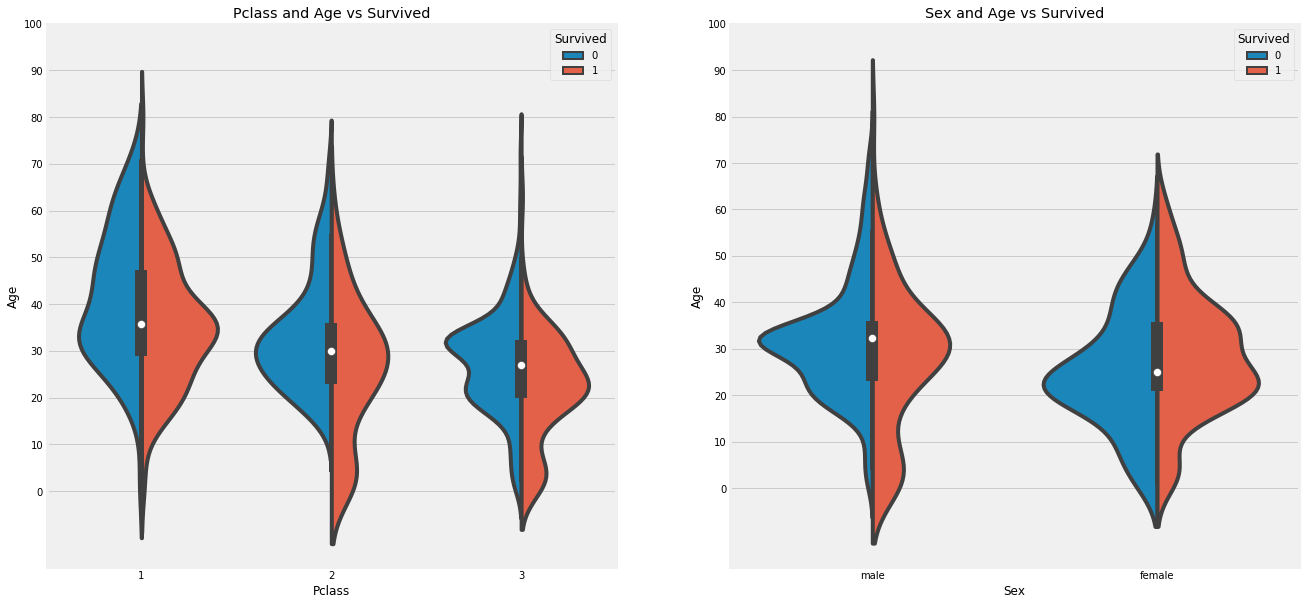

In [333]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.violinplot("Pclass", "Age", hue = "Survived", data = train_df, split = True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", "Age", hue="Survived", data = train_df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

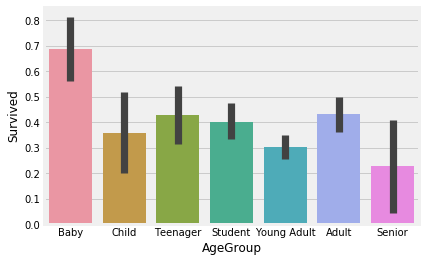

In [334]:
# Bin Age
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels)

sns.barplot(x = "AgeGroup", y = "Survived", data = train_df)
# babies are more likely to survive

In [335]:
# Fill in th emissing Embarked data

train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,FamilySize,IsAlone,Title,AgeGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1,1,Miss,Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1,1,Mrs,Senior


In [336]:
# Since the ticket is first class and the persons survived, lets fill it with C

train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [337]:
test_df["Fare"] = test_df.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))

In [338]:
# Split Fare into bands

train_df['FareRange'] = pd.qcut(train_df['Fare'], 4)

train_df['Farecat'] = 0
train_df.loc[train_df['Fare'] <= 7.91,'Farecat'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare']<=14.454),'Farecat'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare']<=31),'Farecat'] = 2
train_df.loc[(train_df['Fare'] > 31) & (train_df['Fare']<=513),'Farecat'] = 3


test_df['FareRange'] = pd.qcut(test_df['Fare'], 4)

test_df['Farecat'] = 0
test_df.loc[test_df['Fare'] <= 7.91,'Farecat'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare']<=14.454),'Farecat'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare']<=31),'Farecat'] = 2
test_df.loc[(test_df['Fare'] > 31) & (test_df['Fare']<=513),'Farecat'] = 3

In [339]:
train_df = train_df.drop(labels=["PassengerId", "Name", "Ticket", "Cabin", "Fare", "FareRange", "Age"], axis=1)
test_df = test_df.drop(labels=["PassengerId", "Name", "Ticket", "Cabin", "Fare", "FareRange", "Age"], axis=1)

In [340]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [341]:
# Lets also solidify our findings using the correlation matrix

corr = train_df.corr()
print(corr)

                      Survived    Pclass     SibSp     Parch  HasCabin  \
Survived              1.000000 -0.338481 -0.035322  0.081629  0.316912   
Pclass               -0.338481  1.000000  0.083081  0.018443 -0.725541   
SibSp                -0.035322  0.083081  1.000000  0.414838 -0.040460   
Parch                 0.081629  0.018443  0.414838  1.000000  0.036987   
HasCabin              0.316912 -0.725541 -0.040460  0.036987  1.000000   
FamilySize            0.016639  0.065997  0.890712  0.783111 -0.009175   
IsAlone              -0.203367  0.135207 -0.584471 -0.583398 -0.158029   
Farecat               0.295875 -0.628459  0.394248  0.393048  0.497108   
Sex_female            0.543351 -0.131900  0.114631  0.245489  0.140391   
Sex_male             -0.543351  0.131900 -0.114631 -0.245489 -0.140391   
Embarked_C            0.174718 -0.251139 -0.061970 -0.013725  0.218068   
Embarked_Q            0.003650  0.221009 -0.026354 -0.081228 -0.129572   
Embarked_S           -0.155660  0.0817

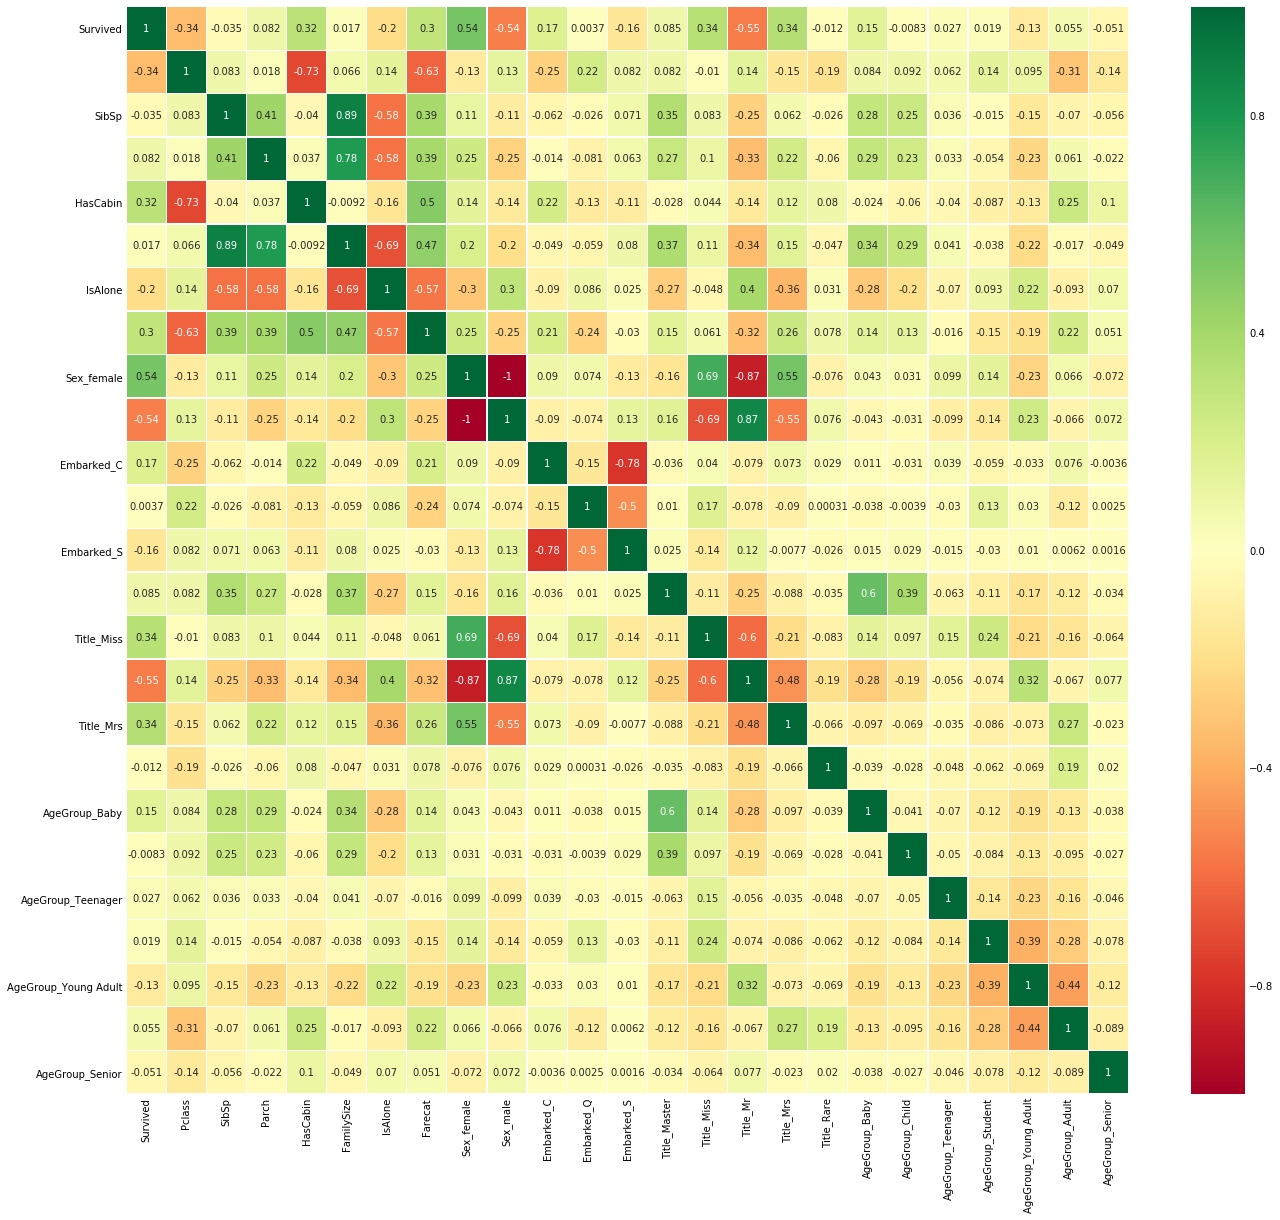

In [342]:
sns.heatmap(corr, annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

In [343]:
display(train_df.sample(n = 5))

,Survived,Pclass,SibSp,Parch,HasCabin,FamilySize,IsAlone,Farecat,Sex_female,Sex_male,...,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
496,1,1,1,0,1,2,0,3,1,0,...,0,0,0,0,0,0,0,0,1,0
33,0,2,0,0,0,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,1
60,0,3,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
342,0,2,0,0,0,1,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
242,0,2,0,0,0,1,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0


In [344]:
# Split into features and target variable
features = train_df.iloc[:, 1:]
target = train_df.iloc[:, 0]

## Model Application

In [345]:
# Create a simple decision tree to see important features

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_split = 10)
classifier.fit(features, target)

print(features.columns)
print(classifier.feature_importances_)

Index(['Pclass', 'SibSp', 'Parch', 'HasCabin', 'FamilySize', 'IsAlone',
       'Farecat', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'AgeGroup_Baby', 'AgeGroup_Child', 'AgeGroup_Teenager',
       'AgeGroup_Student', 'AgeGroup_Young Adult', 'AgeGroup_Adult',
       'AgeGroup_Senior'],
      dtype='object')
[  7.55569729e-02   2.54949598e-02   1.07302983e-02   6.11719850e-02
   1.38442910e-01   4.26872252e-03   5.57724695e-02   0.00000000e+00
   0.00000000e+00   8.54520127e-03   1.02269814e-02   1.08293109e-02
   0.00000000e+00   9.24233670e-03   4.55490665e-01   3.25568505e-04
   5.24007617e-02   1.43249159e-02   4.29981941e-03   5.68054645e-03
   1.29270059e-02   3.19219013e-02   9.30083939e-03   3.04582817e-03]


In [346]:
# split data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state = 0)

In [347]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit

In [348]:
def doGridSearch(classifier, params):
    cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 20, test_size = 0.2, random_state = 0)
    score_fn = make_scorer(accuracy_score)
    grid = GridSearchCV(classifier, params, score_fn, cv = cv_sets)
    grid = grid.fit(X_train, y_train)
    best_clf = grid.best_estimator_
    print(best_clf)
    return best_clf

* Ada Boost

In [349]:
from sklearn.ensemble import AdaBoostClassifier

adaBoostModel = AdaBoostClassifier(random_state = 0)
adaBoostModel.fit(X_train, y_train)
adaPredictions = adaBoostModel.predict(X_test)
adaAccuracy = accuracy_score(y_test, adaPredictions)
print(adaAccuracy)

0.866666666667


* Random Forest

In [350]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(random_state = 0)
randomForestModel.fit(X_train, y_train)
randomPredictions = randomForestModel.predict(X_test)
randomForestAccuracy = accuracy_score(y_test, randomPredictions)
print(randomForestAccuracy)

0.766666666667


* SVM

In [351]:
from sklearn.svm import SVC

svc = SVC(random_state = 0)
svc.fit(X_train, y_train)
svcPredictions = svc.predict(X_test)
svcAccuracy = accuracy_score(y_test, svcPredictions)
print(svcAccuracy)

0.855555555556


* Gradient Boosting Classifier

In [352]:
from sklearn.ensemble import GradientBoostingClassifier

gradientModel = GradientBoostingClassifier(random_state = 0)
gradientModel.fit(X_train, y_train)
gradientPredictions = gradientModel.predict(X_test)
gradientAccuracy = accuracy_score(y_test, gradientPredictions)
print(gradientAccuracy)

0.855555555556


* Logistic Regression

In [353]:
from sklearn.linear_model import LogisticRegression

logisticModel = LogisticRegression(random_state = 0)
logisticModel.fit(X_train, y_train)
logisticPredictions = logisticModel.predict(X_test)
logisticAccuracy = accuracy_score(y_test, logisticPredictions)
print(logisticAccuracy)

0.866666666667


* Naive Bayes

In [354]:
from sklearn.naive_bayes import GaussianNB

naiveModel = GaussianNB()
naiveModel.fit(X_train, y_train)
naivePredictions = naiveModel.predict(X_test)
naiveAccuracy = accuracy_score(y_test, naivePredictions)
print(naiveAccuracy)

0.844444444444


In [355]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines',  'Logistic Regression', 
              'Random Forest', 'Gradient Boosting Classifier', 'Ada Boost'],
    'Score': [svcAccuracy, logisticAccuracy, randomForestAccuracy, gradientAccuracy, adaAccuracy]})
models = models.sort_values(by='Score', ascending=False)
display(models)

,Model,Score
1,Logistic Regression,0.866667
4,Ada Boost,0.866667
0,Support Vector Machines,0.855556
3,Gradient Boosting Classifier,0.855556
2,Random Forest,0.766667


With Models having so close accuracy. Lets fine tune the first four and see.

In [356]:
# Lets use SVC. Lets find the best model using Grid Search

svcModel = SVC(random_state = 0)
params = {"C" : [0.1, 1, 1.1, 1.2], "gamma" : [0.01, 0.02, 0.03, 0.04, 0.08, 0.1, 1], "kernel" : ["linear", "poly", "rbf", "sigmoid"]}

bestSVCModel = doGridSearch(svcModel, params)

# Lets calculate its accuracy
bestSVCModel.fit(X_train, y_train)
predictions = bestSVCModel.predict(X_test)

print(accuracy_score(y_test, predictions))

SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.04, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
0.855555555556


In [357]:
bestSVCModel = SVC(random_state = 0)

bestSVCModel.fit(features, target)
submissions = bestSVCModel.predict(test_df)

submission_df = pd.DataFrame({"PassengerId" : passenger_ids, "Survived" : submissions})
submission_df = submission_df.set_index("PassengerId")
submission_df.to_csv("svm_predictions.csv")

In [358]:
# Lets use Gradient Boosting Classifier

gradientModel = GradientBoostingClassifier(random_state = 0)
params = {"learning_rate" : [0.03, 0.035, 0.04, 0.45], 
          "n_estimators" : [90, 100, 110], 
          "max_depth" : [2, 3],
          "min_samples_split" : [7, 8, 9]}
bestGradientModel = doGridSearch(gradientModel, params)

# Lets Calculate its accuracy
bestGradientModel.fit(X_train, y_train)
predictions = bestGradientModel.predict(X_test)

print(accuracy_score(y_test, predictions))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.04, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=7,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)
0.866666666667


In [359]:
bestGradientModel.fit(features, target)

submissions = bestGradientModel.predict(test_df)

submission_df = pd.DataFrame({"PassengerId" : passenger_ids, "Survived" : submissions})
submission_df = submission_df.set_index("PassengerId")
submission_df.to_csv("gradient_predictions.csv")

In [364]:
# Lets use the ada boost classifier

adaModel = AdaBoostClassifier(random_state = 0)
params = {"n_estimators" : [50, 75, 100, 125, 150, 200],
         "learning_rate" : [0.5, 0.75, 1, 1.25, 1.5]}

bestAdaModel = doGridSearch(adaModel, params)
bestAdaModel.fit(X_train, y_train)
predictions = bestAdaModel.predict(X_test)

print(accuracy_score(y_test, predictions))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=0)
0.877777777778


In [365]:
bestAdaModel.fit(features, target)

submissions = bestAdaModel.predict(test_df)

submission_df = pd.DataFrame({"PassengerId" : passenger_ids, "Survived" : submissions})
submission_df = submission_df.set_index("PassengerId")
submission_df.to_csv("ada_prediction.csv")